This dataset is a Mall_customers datatset which is used here for Customer Segmentation Analysis by using different clustering techniques.
The dataset contains:
CustomerID,
Gender,
Age,
Annual Income(k$),
Spending Score(1-100).
K-Means, Hierarchical Clustering and DBSCAN clustering alogorithms are used here.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [3]:
data_clustering=pd.read_csv("D:/internsavy/Mall_Customers _segmentatn_3.csv",header=0)
data_clustering.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#getting the data types 
data_clustering.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
#getting the col names
data_clustering.keys()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#getting the type of the dataframe
type(data_clustering)

pandas.core.frame.DataFrame

In [7]:
data_clustering.shape

(200, 5)

In [8]:
#replacing values  
gender = {'Male':1, 'Female':0}
data_clustering['Gender']=data_clustering['Gender'].map(gender)
data_clustering['Gender']

#dropping unnecessary col
data_clustering.drop(['CustomerID'], axis=1, inplace=True)

data_clustering.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [9]:
data_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [10]:
data_clustering.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [11]:
#getting the number of unique values
data_clustering.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [12]:
#checking whether there is any null values or not 
data_clustering.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No null values present in the dataset

In [13]:
# checking the no. of duplicate values
data_clustering.duplicated().sum()

0

No duplicate values present in the dataset.

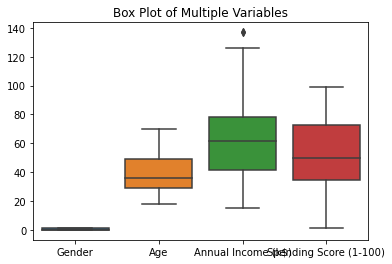

In [14]:
#checking for outliers
sns.boxplot(data=data_clustering)
plt.title("Box Plot of Multiple Variables")
plt.show()

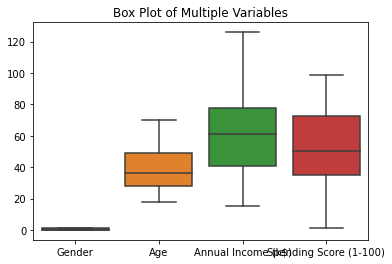

In [15]:
#IQR test to remove outiers

Q1 = data_clustering['Annual Income (k$)'].quantile(0.25)
Q3 = data_clustering['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Remove outliers
data_clustering_filtered = data_clustering[(data_clustering['Annual Income (k$)'] >= lower_bound) & (data_clustering['Annual Income (k$)'] <= upper_bound)]

sns.boxplot(data=data_clustering_filtered)
plt.title("Box Plot of Multiple Variables")
plt.show()


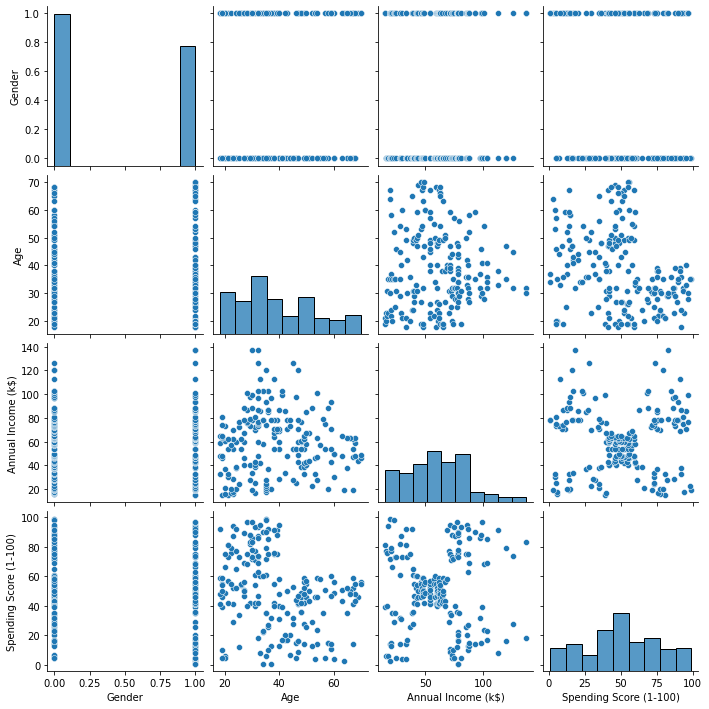

In [16]:
# pairplot- to check whether there is any linear relationship between the variables
sns.pairplot(data_clustering_filtered)

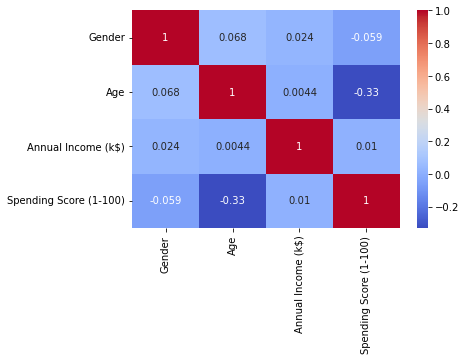

In [17]:
# Compute the correlation matrix
corr_matrix = data_clustering_filtered.corr()

# Create a correlation plot using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the correlation plot
plt.show()

# K Means clustering 

In [18]:
# appling k means clustering with an arbitrary no. of cluster

from sklearn.cluster import KMeans
 # Number of clusters =2 
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(data_clustering)

# Get the cluster labels and cluster centers
labels1 = kmeans1.labels_
centers1 = kmeans1.cluster_centers_

# Print the cluster labels and cluster centers
print("Cluster Labels:", labels1)
print("Cluster Centers:", centers1)

C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
Cluster Centers: [[ 0.43478261 46.16521739 59.36521739 32.88695652]
 [ 0.44705882 28.95294118 62.17647059 73.62352941]]


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

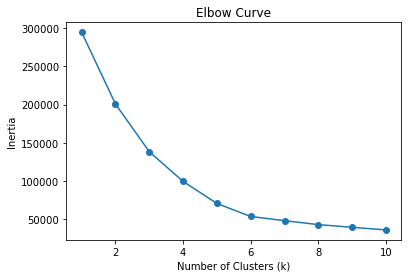

In [20]:
#Elbow Curve
# Create a list to store the inertia values
inertia = []

# Define the range of the number of clusters to try
k_values = range(1, 11)

# Iterate through different values of k
for k in k_values:
    # Create a K-means clustering object
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the data to the model
    kmeans.fit(data_clustering_filtered)
    
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

Looking at the elbow curve we can procceed with 5 clusters or 6 clusters

In [21]:
#Silhouette score
cluster_range = range(4, 9)
from sklearn.metrics import silhouette_score
# Iterate through different cluster numbers
for n_clusters in cluster_range:
    # Create a K-means clustering object
    kmeans = KMeans(n_clusters=n_clusters)
    
    # Fit the data to the model
    kmeans.fit(data_clustering_filtered)
    
    # Get the cluster labels
    labels = kmeans.labels_
    
    # Calculate the silhouette score
    score = silhouette_score(data_clustering_filtered, labels)
    
    # Print the cluster number and silhouette score
    print("Clusters =", n_clusters, "  Silhouette Score =", score)

C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 4   Silhouette Score = 0.40758212907644736


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 5   Silhouette Score = 0.44841883462572846


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 6   Silhouette Score = 0.459547253140841


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 7   Silhouette Score = 0.4409099531650993


C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters = 8   Silhouette Score = 0.4187778677300123


By looking at the silhouette score , we can go for cluster_no =5 or 6.
The silhouette score is a measure of how well each data point fits into its assigned cluster and how distinct the clusters are from each other. It provides a quantitative assessment of the quality of clustering.The silhouette score ranges from -1 to 1, with higher values indicating better-defined and well-separated clusters

In [22]:
#appling K Means clustering with no. of clusters as per elbow method and silhouette score.
#no of clusters=5
kmeans = KMeans(n_clusters=5)

#the fit_predict() method, which fits the K-means model to the data and assigns cluster labels to each data point. 
labels = kmeans.fit_predict(data_clustering_filtered)
centers = kmeans.cluster_centers_

# Print the cluster labels and cluster centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels: [3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1]
Cluster Centers: [[ 0.51428571 40.91428571 86.34285714 17.57142857]
 [ 0.44736842 32.76315789 85.21052632 82.10526316]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.4125     42.9375     55.0875     49.7125    ]]


C:\Users\ANKITA\AppData\Local\Temp/ipykernel_9208/3860004669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering_filtered['Cluster'] = labels


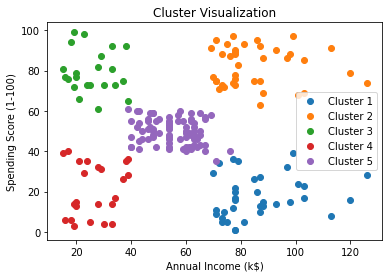

In [23]:
data_clustering_filtered['Cluster'] = labels

# Create a scatter plot with labeled clusters
for cluster_label in range(5):
    cluster_data = data_clustering_filtered[data_clustering_filtered['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Visualization')
plt.legend()

# Show the plot
plt.show()

In [24]:
data_clustering_filtered

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,2
4,0,31,17,40,3
...,...,...,...,...,...
193,0,38,113,91,1
194,0,47,120,16,0
195,0,35,120,79,1
196,0,45,126,28,0


In [25]:
#no of clusters=6
kmeans = KMeans(n_clusters=6)

#the fit_predict() method, which fits the K-means model to the data and assigns cluster labels to each data point. 
labels = kmeans.fit_predict(data_clustering_filtered)
centers = kmeans.cluster_centers_

# Print the cluster labels and cluster centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)

C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ANKITA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels: [3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 5 2 5 0 3 2 5 0 0 0 5 0 0 5 5 5 5 5 0 5 5 0 5 5 5 0 5 5 0 0 5 5 5 5
 5 0 5 0 0 5 5 0 5 5 0 5 5 0 0 5 5 0 5 0 0 0 5 0 5 0 0 5 5 0 5 0 5 5 5 5 5
 0 0 0 0 0 5 5 5 5 0 0 0 1 0 1 4 1 4 1 4 1 0 1 4 1 4 1 4 1 4 1 0 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1]
Cluster Centers: [[ 0.34210526 27.         56.65789474 49.13157895  3.78947368]
 [ 0.44736842 32.76315789 85.21052632 82.10526316  1.        ]
 [ 0.40909091 25.27272727 25.72727273 79.36363636  2.        ]
 [ 0.38095238 44.14285714 25.14285714 19.52380952  3.        ]
 [ 0.55882353 41.97058824 86.79411765 17.26470588  0.11764706]
 [ 0.44444444 56.15555556 53.37777778 49.08888889  3.95555556]]


C:\Users\ANKITA\AppData\Local\Temp/ipykernel_9208/4157426841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering_filtered['Cluster'] = labels


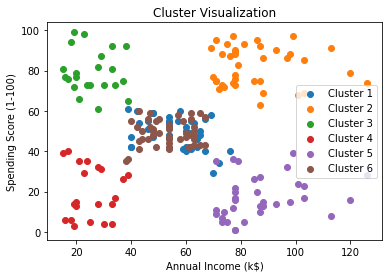

In [26]:
data_clustering_filtered['Cluster'] = labels

# Create a scatter plot with labeled clusters
for cluster_label in range(6):
    cluster_data = data_clustering_filtered[data_clustering_filtered['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Cluster Visualization')
plt.legend()

# Show the plot
plt.show()

The silhouette score is a measure of the overall clustering quality based on the average distance between data points within clusters and the average distance between data points from different clusters. However, it does not take into account the specific structure or characteristics of the clusters.

In some cases, even if the silhouette score is higher for a larger number of clusters (in my case its 6 ), it is possible for the clusters to overlap or have ambiguous boundaries. This can occur when the data points are not well-separated or when the clustering algorithm struggles to identify distinct clusters.

If the clusters with a lower number (5 in my case) appear to have clearer boundaries and better separation, then cluster no=5 is more meaningfull, despite having a slightly lower silhouette score than cluster no=6

# Hierarchical Clustering

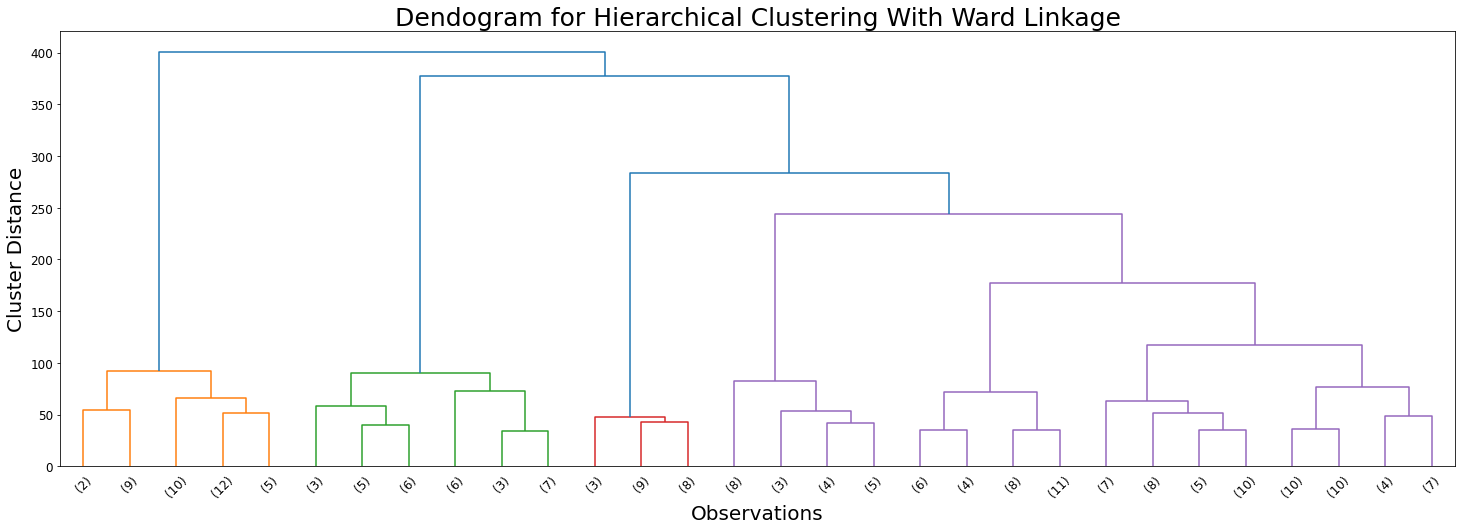

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize = (25, 8))
ax = plt.axes()
ax = dendrogram(linkage(data_clustering_filtered, method = 'ward'), truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize = 25)
plt.xlabel('Observations', fontsize = 20)
plt.ylabel('Cluster Distance', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

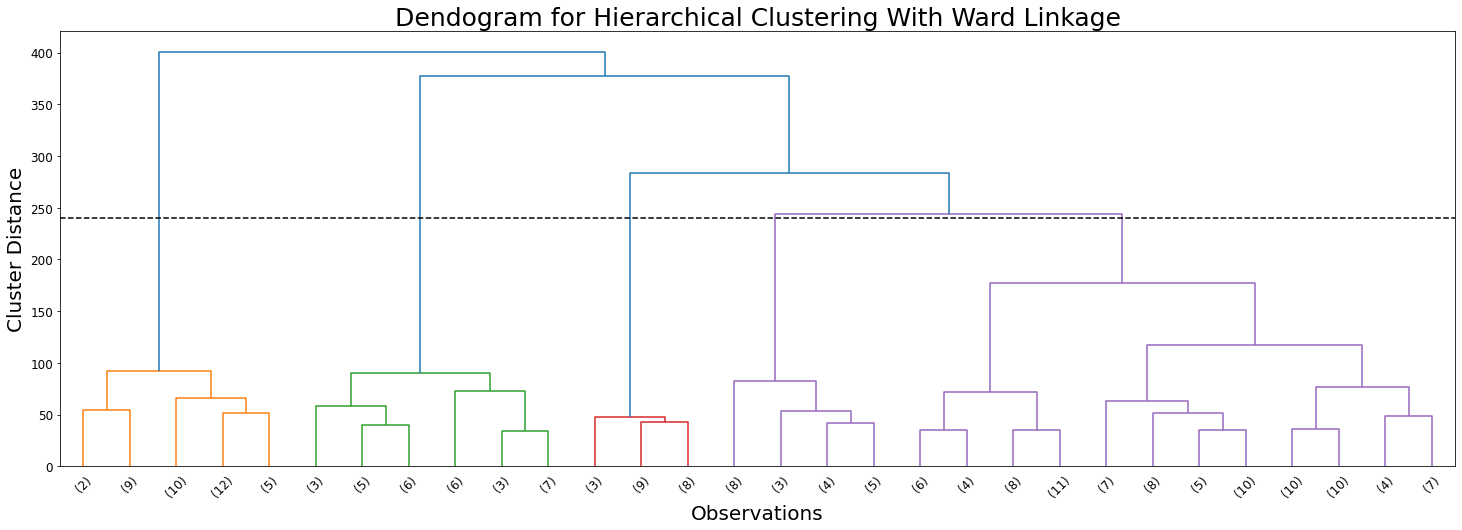

In [28]:
# from the silhouette score and elbow method , no of clusters is set to 5 so a line is drawn at 240 distance 
plt.figure(figsize = (25, 8))
ax = plt.axes()
ax = dendrogram(linkage(data_clustering_filtered, method = 'ward'), truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Dendogram for Hierarchical Clustering With Ward Linkage', fontsize = 25)
plt.axhline(y = 240, color = 'Black', linestyle = '--')
plt.xlabel('Observations', fontsize = 20)
plt.ylabel('Cluster Distance', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()


C:\Users\ANKITA\AppData\Local\Temp/ipykernel_9208/2056873914.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering_filtered['Labels'] = agglomerative_clusters.labels_


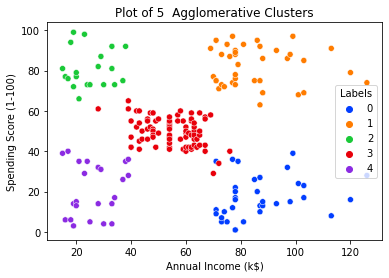

In [37]:
#complete linkage is choosen since there is no outliers
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

agglomerative_clusters = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(data_clustering_filtered)

data_clustering_filtered['Labels'] = agglomerative_clusters.labels_
#plt.figure(figsize=(14, 9))
sns.scatterplot(data=data_clustering_filtered,x=data_clustering_filtered['Annual Income (k$)'],y= data_clustering_filtered['Spending Score (1-100)'], hue=data_clustering_filtered['Labels'], palette=sns.color_palette('bright', 5))
plt.title('Plot of 5  Agglomerative Clusters')
plt.show()

# DBSCAN clustering

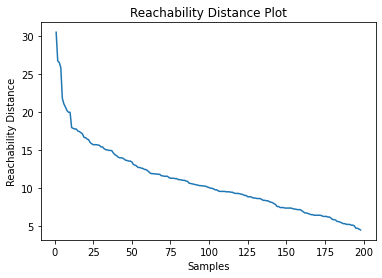

In [30]:
from sklearn.neighbors import NearestNeighbors

# Compute reachability distances
k = 5 # Number of neighbors for reachability plot
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data_clustering_filtered)
distances, _ = neigh.kneighbors(data_clustering_filtered)
reachability_distances = np.max(distances, axis=1)

# Sort reachability distances
sorted_distances = np.sort(reachability_distances)[::-1]

# Plot reachability distance plot
plt.plot(range(1, len(data_clustering_filtered) + 1), sorted_distances)
plt.xlabel('Samples')
plt.ylabel('Reachability Distance')
plt.title('Reachability Distance Plot')
plt.show()

The reachability distance plot shows the reachability distances of each sample from a chosen reference point. By analyzing the plot, we can identify the value of eps where the reachability distances start to increase significantly. This can help determine a suitable eps value for clustering. 
So, from the reachability distance plot , the eps may be between 10 to 16.So, now, we can use trial and error method to achieve satisfactory clustering results.

The min_samples value should be at least 1 greater than the dimensionality of the dataset. Here, my dataset has 5 dimensional points, the min_samples value should be at least 6.So, we can use trial and error method to achieve satisfactory clustering results.

In [31]:
#!pip install plotly
from sklearn.cluster import DBSCAN
import plotly.express as px
from itertools import product
from sklearn.metrics import silhouette_score

#calculate silhouette score
eps_values = np.arange(10, 16, 1)
min_samples_values = np.arange(6, 13, 1)
param_list = list(product(eps_values, min_samples_values))#the Cartesian product of the two lists.Each combination of eps and min_samples values will form a tuple.

clusters = []
sil_score = []

for param in param_list:
    dbscan = DBSCAN(eps = param[0], min_samples = param[1]).fit(data_clustering_filtered)
    clusters.append(len(np.unique(dbscan.labels_)))
    sil_score.append(silhouette_score(data_clustering_filtered, dbscan.labels_))

dbscan_df = pd.DataFrame.from_records(param_list, columns = ['Eps', 'Min Samples'])
dbscan_df['Number of Clusters'] = clusters
dbscan_df['Silhouette Score'] = sil_score
dbscan_df

,Eps,Min Samples,Number of Clusters,Silhouette Score
0,10,6,5,0.202119
1,10,7,6,0.092451
2,10,8,5,0.108119
3,10,9,6,0.029835
4,10,10,6,-0.057758
5,10,11,5,-0.104369
6,10,12,4,-0.146591
7,11,6,5,0.187259
8,11,7,6,0.046166
9,11,8,5,0.158391


Here, the silhouette score is maximum for eps=15 and min sample=6 , then the 2nd highest is for eps=15 and min sample =7.So we can use trial and error method to get which one combination gives a better result.

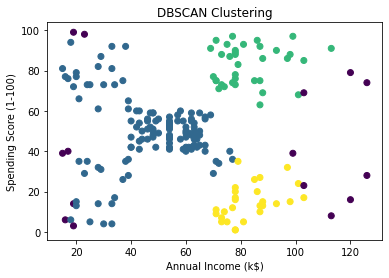

In [36]:
import matplotlib.pyplot as plt
#min sample=6 and eps=15

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=15, min_samples=6)
labels = dbscan.fit_predict(data_clustering_filtered)

# Plot the results
plt.scatter(data_clustering_filtered['Annual Income (k$)'], data_clustering_filtered['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()


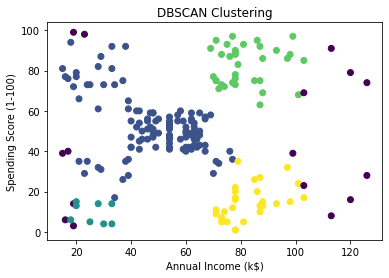

In [45]:
import matplotlib.pyplot as plt
#min sample=7 and eps=15 

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=15, min_samples=7)
labels = dbscan.fit_predict(data_clustering_filtered)

# Plot the results
plt.scatter(data_clustering_filtered['Annual Income (k$)'], data_clustering_filtered['Spending Score (1-100)'], c=labels, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

We choose no of clusters=5,eps=15, and min sample=7 in the DBSCAN clustering since it gives better results.